## 총점 및 순위 계산

### 1. 읽어들일 파일명 지정 ==> 가지고 있는 파일명으로 수정필요

In [1]:
########### file_name 선언 ##################################
전처리데이터셋 = 'C:\\Users\\USER\\Desktop\\제주전기차_수정\\전처리데이터3.csv'
##########################################################

### 2. 화면에 출력되는 칼럼명을 확인한 후, 필요한 칼럼명을 복사하여 붙여넣기 (수정 불필요)

In [2]:
import pandas as pd
df = pd.read_csv(f'{전처리데이터셋}', header=0, encoding='euc-kr', engine='python')
df.set_index('gid', inplace=True)
전체칼럼 = df.columns.tolist()
print ("여기 칼럼명을 확인하신 후 점수계산에 필요한 칼럼명만 복사 하세요.\n", 전체칼럼)

여기 칼럼명을 확인하신 후 점수계산에 필요한 칼럼명만 복사 하세요.
 ['주차장', '건물1', '건물2', '건물3', '관공서', '생산가능인구', '전기차', '방문인구', '관광지', '충전소', 'lon', 'lat', '거리_전기차', '거리_충전소']


### 3. 하단에 있는 "점수칼럼"에 점수로 환산할 대상인 칼럼을 수정하도록 함 ==> 수정 필요

In [3]:
df.head()

,주차장,건물1,건물2,건물3,관공서,생산가능인구,전기차,방문인구,관광지,충전소,lon,lat,거리_전기차,거리_충전소
gid,,,,,,,,,,,,,,
다다50bb02ba,0,1,0,0,0,0,0,0.03000,0,0,126.971038,33.514392,0,0
다다50bb01aa,0,0,0,0,0,0,0,0.07244,0,0,126.971120,33.500863,1,0
다다50bb00bb,0,1,0,0,0,0,0,0.04251,0,0,126.971134,33.498608,1,0
다다50ba02bb,0,0,0,0,0,0,0,0.09000,0,0,126.968332,33.516635,0,0
다다50ba02ba,0,3,0,0,0,0,0,0.09000,0,0,126.968346,33.514380,1,0


In [4]:
#점수칼럼 =  ['건물1', '건물2', '건물3', '관공서', '도서관', '경제인구', '교통량', '전기차', '관광지']
점수칼럼 =  ['주차장','건물1','건물2','건물3','관공서','생산가능인구','전기차','방문인구', '관광지', '충전소', 
         '거리_전기차', '거리_충전소']
print("입력한 점수컬럼명은 다음과 같음\n", 점수칼럼)

가중치 = [1] * len(점수칼럼)
print(가중치)

입력한 점수컬럼명은 다음과 같음
 ['주차장', '건물1', '건물2', '건물3', '관공서', '생산가능인구', '전기차', '방문인구', '관광지', '충전소', '거리_전기차', '거리_충전소']
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


### 4. 건물 가중치 선언 ==> 필요시 수정
- 각 건물과 관광지에 대한 가중치를 수기로 선언함
- 필요시 가중치 조절 하십시오 
- 필요시 가중치 추가 또는 삭제 하십시오

In [5]:
#점수칼럼  순서대로 점수칼럼 갯수만큼 가중치를 입력하십시오

#예를들어 이렇게 가중치를 주고 싶을 경우에는
#건물1가중치=1
#건물2가중치 = 2
#건물3가중치  = 3
#관광지가중치=1
#도서관가충치=1
#경제인구가중치=1
#전기차가중치=1
#아래 처럼 입력합니다.

##### 여기만 수정하면 됩니다 ###############################
가중치 = [1, 1, 2, 3, 3, 1, 1, 1, 2, -3, 1, -2]      # 점수칼럼 갯수 만큼, 구분은 쉼표
##### 여기만 수정하면 됩니다 ###############################


# 수정 불필요
if (len(가중치) != len(점수칼럼)):
    print("입력한 가중치 갯수가 점수칼럼 갯수와 다르므로 확인후 다시 입력 바랍니다")
else:
    print("다음 줄을 실행 하세요")
print(가중치)

다음 줄을 실행 하세요
[1, 1, 2, 3, 3, 1, 1, 1, 2, -3, 1, -2]


### 5.  MinMax정규화 

In [6]:
df = pd.read_csv(f'{전처리데이터셋}', header=0, encoding='cp949', engine='python')
df.set_index('gid', inplace=True)
################## QGIS에서 작업한 전처리 결과 CSV 읽기 ####################################################
pre_process_set = pd.read_csv(f'{전처리데이터셋}', header=0, encoding='cp949', engine='python')
pre_process_set = pre_process_set.sort_values(by='gid')

# Null 이 있을 수 있는 칼럼은 Null을 0로 변경
pre_process_set.fillna(0, inplace=True)
##################  QGIS에서 작업한 전처리 결과 CSV 읽기 끝###################################################

################## MinMax정규화 ##########################################################################
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# 점수칼럼 정규화
norm = pre_process_set.copy()
norm.fillna(0, inplace=True)
norm.set_index('gid', inplace=True)

norm[점수칼럼] = scaler.fit_transform(norm.loc[:,점수칼럼])
norm.reset_index(inplace=True)
################## 정규화 끝################################################################################

In [7]:
print(norm)

              gid  주차장       건물1  건물2  건물3  관공서  생산가능인구  전기차      방문인구  관광지  \
0      나나73bb80ba  0.0  0.000000  0.0  0.0  0.0     0.0  0.0  0.000000  0.0   
1      나나73bb80bb  0.0  0.000000  0.0  0.0  0.0     0.0  0.0  0.000000  0.0   
2      나나74aa80ba  0.0  0.000000  0.0  0.0  0.0     0.0  0.0  0.000000  0.0   
3      나나74aa80bb  0.0  0.000000  0.0  0.0  0.0     0.0  0.0  0.000000  0.0   
4      나나74ab80ab  0.0  0.000000  0.0  0.0  0.0     0.0  0.0  0.000000  0.0   
...           ...  ...       ...  ...  ...  ...     ...  ...       ...  ...   
30523  다다50ba02ba  0.0  0.007264  0.0  0.0  0.0     0.0  0.0  0.007014  0.0   
30524  다다50ba02bb  0.0  0.000000  0.0  0.0  0.0     0.0  0.0  0.007014  0.0   
30525  다다50bb00bb  0.0  0.002421  0.0  0.0  0.0     0.0  0.0  0.003313  0.0   
30526  다다50bb01aa  0.0  0.000000  0.0  0.0  0.0     0.0  0.0  0.005645  0.0   
30527  다다50bb02ba  0.0  0.002421  0.0  0.0  0.0     0.0  0.0  0.002338  0.0   

       충전소         lon        lat  거리_전기차  거리_충전소  

In [8]:
# 총점 계산
df = norm.copy()

for i in range(0, len(점수칼럼)):
    name = 점수칼럼[i]
    df[name] = df[name] * 가중치[i] 

df.set_index(['gid','lon','lat'], inplace=True)

df['sum'] = df.sum(1)
df.reset_index(inplace=True)

# 등수 계산 
df['순위'] = df['sum'].rank(method='dense', ascending=False).astype(int)

final = df.sort_values(by='순위')
final.reset_index(drop=True, inplace=True)

# 상위 20개만 학인
display("결과", final.head(10))
# 최종 결과 CSV 파일쓰기
final.to_csv('결과_총점_수정.csv', index=False, sep=',', encoding='cp949')

'결과'

,gid,lon,lat,주차장,건물1,건물2,건물3,관공서,생산가능인구,전기차,방문인구,관광지,충전소,거리_전기차,거리_충전소,sum,순위
0,나나90ab97ba,126.320292,33.464809,0.000000,0.503632,0.746988,0.142857,2.0,0.078239,0.048507,0.011503,0.0,-0.000000,1.0,-0.0,4.531726,1
1,다다11aa01bb,126.543137,33.505061,0.166667,0.108959,0.072289,2.285714,0.0,0.729799,0.152985,0.385423,1.0,-0.000000,1.0,-2.0,3.901837,2
2,다다10ab00ba,126.535189,33.493725,0.166667,0.123487,0.289157,0.428571,3.0,0.158187,0.044776,0.448705,0.0,-0.032967,1.0,-2.0,3.626583,3
3,다다05bb00aa,126.486805,33.488830,0.000000,0.125908,0.289157,2.000000,1.0,0.563489,0.089552,0.688862,0.0,-0.164835,1.0,-2.0,3.592132,4
4,다나17ba75aa,126.615557,33.264330,0.000000,0.145278,0.120482,0.142857,2.0,0.076956,0.007463,0.014121,0.0,-0.000000,1.0,-0.0,3.507158,5
5,다다14ab03ba,126.577957,33.521109,0.000000,0.019370,0.024096,1.714286,0.0,0.428388,0.082090,0.180585,0.0,-0.000000,1.0,-0.0,3.448816,6
6,다나12aa75aa,126.556512,33.263896,0.000000,0.363196,0.144578,1.142857,0.0,0.150492,0.055970,0.048287,0.5,-0.000000,1.0,-0.0,3.405380,7
7,다다09ba00ba,126.527116,33.493662,0.166667,0.280872,0.746988,0.285714,2.0,0.425823,0.063433,0.304904,0.0,-0.000000,1.0,-2.0,3.274400,8
8,다다09bb00ab,126.529832,33.491429,0.000000,0.215496,0.385542,2.142857,0.0,0.581873,0.126866,0.317061,0.5,-0.000000,1.0,-2.0,3.269695,9
9,다다09bb00aa,126.529857,33.489174,0.000000,0.050847,0.144578,1.428571,0.0,0.345874,0.108209,0.143334,0.0,-0.000000,1.0,-0.0,3.221414,10


## 6. 지도로 보기
- 인터넷 환경이 안되면 생략

### 6.1 지도로 보기 선택 사항
- 상단에서 도출된 결과값들 중에서 상위 3개만 지도로 보여주기
- Google Map 처럼 보여지며, 마우스로 스크롤하면 지도 크기가 Zoom 됨
- 이를 위해서 Anaconda Promprt 창을 열고 아래 함수를 복사하여 그대로 엔터
 - pip install folium

#### 수정 필요 - 수정 안하면 상위 20개를 조회

In [9]:
# 보고 싶은 상위권 갯수를 입력하세요
지도보기갯수 = 10   # 보고싶은 상위권 갯수를 여기에 입력, 만약 3이면 최상위 3개만 보겠다는 의미

### 6.2 수정 불필요

In [10]:
# 지도로 보여주기
import folium
print(f"보고자 하는 상위권 갯수는 {지도보기갯수}개 입니다.")
for i in range(지도보기갯수):
    지도보기 = folium.Map(location=[final.loc[i,'lat'],final.loc[i,'lon']], zoom_start = 15)
    folium.Marker([final.loc[i,'lat'],final.loc[i,'lon']]).add_to(지도보기)
    print (final.loc[i,'lat'],final.loc[i,'lon'])
    j = i+1
    display(f'상위 {j}번째 격자의 센터 위치 보기', 지도보기)

보고자 하는 상위권 갯수는 10개 입니다.
33.464809 126.3202919


'상위 1번째 격자의 센터 위치 보기'

33.50506106 126.54313729999998


'상위 2번째 격자의 센터 위치 보기'

33.49372548 126.5351886


'상위 3번째 격자의 센터 위치 보기'

33.48882973 126.4868051


'상위 4번째 격자의 센터 위치 보기'

33.2643305 126.6155575


'상위 5번째 격자의 센터 위치 보기'

33.52110866 126.5779566


'상위 6번째 격자의 센터 위치 보기'

33.26389646 126.55651189999999


'상위 7번째 격자의 센터 위치 보기'

33.49366235 126.5271159


'상위 8번째 격자의 센터 위치 보기'

33.49142886 126.52983190000002


'상위 9번째 격자의 센터 위치 보기'

33.48917427 126.5298571


'상위 10번째 격자의 센터 위치 보기'

### 6. Box Plot 보기 선택 사항 - 수정 불필요
- 상기 선택사항 실행여부와 무관하게 9번은 실행가능함
- 값들이 몇점대에 몰려 있는지 확인해보는 Box Plot 그래프
- 맨 하단부에 몰려 있을 가능성이 높음. 이유는 절반이상이 0점이기 때문

In [41]:
#참고) 총점 분포도
import matplotlib.pyplot as plt

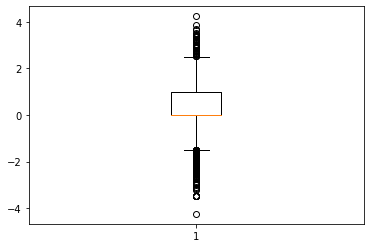

In [42]:
plt.figure()
plt.boxplot(final['sum'])
plt.show()

끝